In [1]:
import pickle
import re
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
import matplotlib
from matplotlib import pyplot as plt

In [4]:
from dataReader import *

/Users/driveresearch/anaconda3/lib/python2.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [5]:
with open('../data/processed/movies.pkl', 'rb') as movies_pkl:
    movies = pickle.load(movies_pkl)

# Year vs. average female-to-male cast ratio

In [57]:
yearDict = {}
for movie in movies:
    if movie.lang == 'en':
        num_female = len(movie.cast.get_female_cast())
        num_male = len(movie.cast.get_male_cast())
        if num_male == 0:
            if num_female > 0:
                ratio = 1.0
            else:
                ratio = 0.0
        else:
            ratio = float(num_female)/num_male
        if not isinstance(movie.date, str):
            continue
        year = int(movie.date[:4])
        if year in yearDict:
            yearDict[year] += [ratio]
        else:
            yearDict[year] = [ratio]
X = []
y = []
for year in yearDict:
    X.append([int(year)])
    y.append(np.mean(yearDict[year]))
X = np.array(X)
y = np.array(y)

In [58]:
reg = LinearRegression().fit(X, y)

In [59]:
reg.coef_

array([0.00310923])

In [60]:
reg.intercept_ 

-5.61080715282031

In [61]:
y_pred = reg.predict(X)

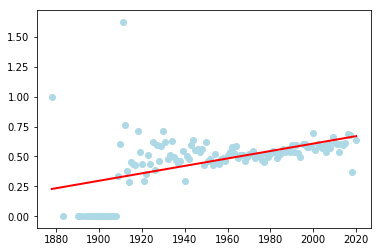

In [62]:
plt.scatter(X[:,0],y,color='lightblue')
plt.plot(X[:,0],y_pred,color='red', linewidth=2)

In [48]:
reg.predict(np.array([[2020]]))

array([0.6698437])

In [49]:
reg.predict(np.array([[2030]]))

array([0.70093603])

In [50]:
reg.predict(np.array([[2040]]))

array([0.73202836])

In [51]:
reg.predict(np.array([[2050]]))

array([0.76312069])

# Regression: year + bow vs. female-to-male cast ratio

In [52]:
gender_patterns = [r"(?i)\bhe\b",
                   r"(?i)\bhim\b",
                   r"(?i)\bhis\b",
                   r"(?i)\bhimself\b",
                   r"(?i)\bman\b",
                   r"(?i)\bboy\b",
                   r"(?i)\blord\b",
                   r"(?i)\bsir\b",
                   r"(?i)\bfather\b",
                   r"(?i)\bgrandfather\b",
                   r"(?i)\bson\b", 
                   r"(?i)\bgrandson\b", 
                   r"(?i)\bbrother\b",
                   r"(?i)\bhusband\b",
                   r"(?i)\bboyfriend\b",
                   r"(?i)\buncle\b",
                   r"(?i)\bnephew\b",
                   r"(?i)\bshe\b",
                   r"(?i)\bher\b",
                   r"(?i)\bhers\b",
                   r"(?i)\bherself\b",
                   r"(?i)\bwoman\b",
                   r"(?i)\bgirl\b",
                   r"(?i)\blady\b",
                   r"(?i)\bmadam\b",
                   r"(?i)\bmother\b",
                   r"(?i)\bgrandmother\b",
                   r"(?i)\bdaughter\b", 
                   r"(?i)\bgranddaughter\b", 
                   r"(?i)\bsister\b",
                   r"(?i)\bwife\b",
                   r"(?i)\bgirlfriend\b",
                   r"(?i)\baunt\b",
                   r"(?i)\bniece\b"]

In [53]:
X = []
y = []
for movie in movies:
    if movie.lang == 'en':
        if not isinstance(movie.date, str):
            continue
        if not isinstance(movie.overview, str):
            continue
        year = int(movie.date[:4])
        bow_vector = [0] * len(gender_patterns)
        for i in range(len(gender_patterns)):
            pattern = gender_patterns[i]
            bow_vector[i] = len(re.findall(pattern, movie.overview))
        num_female = len(movie.cast.get_female_cast())
        num_male = len(movie.cast.get_male_cast())
        if num_male == 0:
            if num_female > 0:
                ratio = 1.0
            else:
                ratio = 0.0
        else:
            ratio = float(num_female)/num_male
        X.append([year] + bow_vector)
        y.append(ratio)
X = np.array(X)
y = np.array(y)

In [54]:
reg2 = LinearRegression().fit(X, y)

In [55]:
reg2.coef_

array([ 0.00196131, -0.00938181,  0.00060612, -0.01883477, -0.06328047,
       -0.04728943, -0.01352373, -0.10219383, -0.04466916, -0.0184048 ,
       -0.01386901, -0.00150656,  0.1008569 , -0.02415882,  0.08578996,
        0.02704775, -0.02956841,  0.09406215,  0.04004039,  0.0693289 ,
       -0.07280574,  0.11247093,  0.11776258,  0.16313531,  0.0632939 ,
        0.41049857,  0.14284822,  0.1705879 ,  0.13669169,  0.22338932,
        0.11636392,  0.0834649 ,  0.14178295,  0.11000807,  0.07356729])

In [56]:
reg2.intercept_ 

-3.3963871812633526

In [65]:
for movie in movies:
    if movie.title == 'Toy Story':
        year = int(movie.date[:4])
        bow_vector = [0] * len(gender_patterns)
        for i in range(len(gender_patterns)):
            pattern = gender_patterns[i]
            bow_vector[i] = len(re.findall(pattern, movie.overview))
        num_female = len(movie.cast.get_female_cast())
        num_male = len(movie.cast.get_male_cast())
        if num_male == 0:
            if num_female > 0:
                ratio = 1.0
            else:
                ratio = 0.0
        else:
            ratio = float(num_female)/num_male
        print [year] + bow_vector
        print ratio

[1995, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.333333333333
